In [1]:
# Import standard libraries
import os
import re
import numpy as np
import pandas as pd
from collections import Counter

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colormaps
import seaborn as sns

# Uncomment below if pandas and openpyxl are not installed
# !pip install pandas openpyxl

# You can uncomment these imports if needed
# from numpy import stack
# from sympy import li

In [2]:
organ_mapping = {
    'cervical': 'Cervix',
    'head and neck ': 'Head and Neck',
    'oropharynx': 'Oropharynx',
    'colon': 'Intestine',
    'colon\\n\\n\\n': 'Intestines',
    'colon\n\n\n\n': 'Intestines',
    'colon\n\n\n': 'Intestines',
    'colorectal': 'Intestines',
    'colorectal ': 'Intestines',
    'colon  ': 'Intestines',
    'brain': 'Human Brain',
    'brain ': 'Human Brain',
    'human brain': 'Human Brain',
    'cerebral': 'Human Brain',
    'monkey brain': 'Monkey Brain',
    'breast': 'Breast',
    'liver': 'Liver',
    'lung': 'Lung',
    'prostate': 'Prostate',
    'pancreas': 'Pancreas',
    'kidney': 'Kidney',
    'renal': 'Kidney',
    'hepatic vein': 'Liver',
    'hepatic': 'Liver',
    'head': 'Head and Neck',
    'neck': 'Head and Neck',
    'head and neck': 'Head and Neck',
    'h&n': 'Head and Neck',
    'abdomen': 'Stomach',
    'stomach': 'Stomach',
    'chest': 'Chest',
    'eye': 'Eye',
    'gallbladder': 'Gallbladder',
    'heart': 'Heart',
    'cardiac': 'Heart',
    'bladder': 'Bladder',
    'lymp nodes': 'Lymph Node',
    'lymp node': 'Lymph Node',
    'lymph node': 'Lymph Node',
    'pelvic region': 'Pelvic Region',
    'pelvic': 'Pelvic Region',
    'pelvis': 'Pelvic Region',
    'skin': 'Skin',
    'spleen': 'Spleen',
    'swine liver': 'Swine Liver',
    'thyroid': 'Thyroid',
    'whole body': 'Whole Body',
    'femoral head': 'Pelvic Region',
    'thorax': 'Chest',
    'rectum': 'Intestine',
    'colorectum': 'Intestine',
    'cervix': 'Cervix',
    'small intestine': 'Intestine',
    'pituitary gland': 'Pituitary Gland',
    'stroma': 'Stroma',
    'tissue': 'Tissue',
    'arterial': 'Blood Vessel',
    'blood vessels': 'Blood Vessel',
    'No Organ Mentioned': 'Organ unspecified',
    'no organ mentioned': 'Organ unspecified',
}

In [3]:
def save_plot_to_folder(fig, filename, base_dir="05MICCAI_notebook_data_visualization"):
    """
    Saves a matplotlib figure to a specified directory with the given filename.
    
    Parameters:
        fig (matplotlib.figure.Figure): The figure object to save.
        filename (str): The name of the file to save the plot as.
        base_dir (str): The base directory where the plot will be saved.
    """
    # Ensure the base directory exists
    full_path = os.path.join(base_dir, filename)
    os.makedirs(os.path.dirname(full_path), exist_ok=True)
    
    # Save the figure
    fig.savefig(full_path, dpi=300, bbox_inches='tight', transparent=True)
    print(f"Plot saved to {full_path}")

In [4]:
def analyze_organ_distribution_extensive_use_demographics(df, organ_column, dataset_column, save_path_base, organ_mapping=organ_mapping):
    """Analyzes and plots the distribution of organs where extensive demographic data is provided."""

    # Expand and explode the organ categories
    df[organ_column] = df[organ_column].str.split(', ')
    df_expanded = df.explode(organ_column)
  
    df_expanded[organ_column] = df_expanded[organ_column].map(organ_mapping).fillna(df_expanded[organ_column])

    # Filter the data for dataset quantity == 1
    dataset_quantity = df_expanded[df_expanded[dataset_column] == 1]
    print(f"Number of articles with only one dataset: {len(dataset_quantity)}")

    # Group by organ and count occurrences
    grouped_extensive_demo = dataset_quantity.groupby(organ_column).size().reset_index(name='Count')
    grouped_extensive_demo_sorted = grouped_extensive_demo.sort_values('Count', ascending=False)
    #grouped_extensive_demo_sorted['Percentage'] = grouped_extensive_demo_sorted['Count'] / grouped_extensive_demo_sorted['Count'].sum() * 100

    # Plotting the details for 'Extensive Demographic Data' with horizontal bars
    colors = plt.cm.Set3_r.colors
    plt.figure(figsize=(10, 4))
    
    #plt.barh(grouped_extensive_demo_sorted[organ_column], grouped_extensive_demo_sorted['Percentage'], color=colors,edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)
    plt.barh(grouped_extensive_demo_sorted[organ_column], grouped_extensive_demo_sorted['Count'], color=colors,edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)

    #plt.xlabel('Percentage of Articles (%)', fontsize=10, labelpad=10, loc='right', style='italic')
    plt.xlabel('Number of Articles', fontsize=9.5, labelpad=10, loc='right', style='italic')
    plt.ylabel('Individual Organs', fontsize=9.5, labelpad=10, loc='center', style='italic')
    
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    #plt.xticks(range(0, int(3) + 1, 1))

    plt.grid(axis='x', linestyle='--', which='both', color='gray', alpha=0.5)
    
    #plt.savefig(f'{save_path_base}_extensive_use_of_demographic_data.png', dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, f'{save_path_base}_dataset.png') # Save the plot to the plots folder
    plt.tight_layout()
    plt.show()

In [5]:
base_path = '00MICCAI_total_outputs/05MICCAI_all_outputs/'


df = pd.read_csv(base_path + '05MICCAI_notebook_preprocessed_annotation_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '00MICCAI_total_outputs/05MICCAI_all_outputs/05MICCAI_notebook_preprocessed_annotation_data.csv'

In [13]:
#df[['title', 'dataset quantity', 'age', 'sex/gender', 'ethnicity', 'geographical location ','demographics_usage']].to_csv(base_path + '05MICCAI_notebook_demographic_usage.csv', index=False)
#df[['title', 'dataset quantity','demographics_usage', 'organ_category_refined', 'image_category','dataset_disclosure_category', 'dataset_status', 'location_category']].to_csv(base_path + '05MICCAI_notebook_preprocessed_columns.csv', index=False)

Number of articles with only one dataset: 51
Plot saved to 05MICCAI_notebook_data_visualization/05MICCAI_notebook_data_visualization_dataset.png


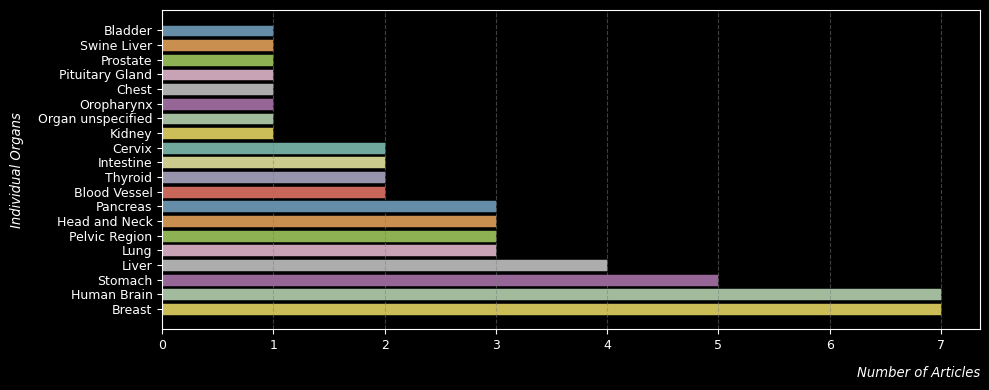

In [33]:
analyze_organ_distribution_extensive_use_demographics(df, 'organ/body part in datasets', 'dataset quantity', '05MICCAI_notebook_data_visualization')

In [60]:
def analyze_organ_distribution_extensive_use_demographics(df, organ_column, dataset_column, save_path_base, organ_mapping=organ_mapping):
    """Analyzes and plots the distribution of organs where extensive demographic data is provided."""

    # Expand and explode the organ categories
    df[organ_column] = df[organ_column].str.split(', ')
    df_expanded = df.explode(organ_column)
    print(df_expanded[organ_column])
  
    df_expanded[organ_column] = df_expanded[organ_column].map(organ_mapping).fillna(df_expanded[organ_column])

    # Filter the data for dataset quantity == 1
    dataset_filter = df[df[dataset_column] >= 3]
    print(f"Number of articles with only one dataset: {dataset_filter['dataset quantity'].sum()}")
    
    # Group by organ and count occurrences
    grouped_extensive_demo = dataset_filter.groupby(organ_column).size().reset_index(name='Count')
    grouped_extensive_demo_sorted = grouped_extensive_demo.sort_values('Count', ascending=False)
    #grouped_extensive_demo_sorted['Percentage'] = grouped_extensive_demo_sorted['Count'] / grouped_extensive_demo_sorted['Count'].sum() * 100

    # Plotting the details for 'Extensive Demographic Data' with horizontal bars
    colors = plt.cm.Set3_r.colors
    plt.figure(figsize=(10, 4))
    
    #plt.barh(grouped_extensive_demo_sorted[organ_column], grouped_extensive_demo_sorted['Percentage'], color=colors,edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)
    plt.barh(grouped_extensive_demo_sorted[organ_column], grouped_extensive_demo_sorted['Count'], color=colors,edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)

    #plt.xlabel('Percentage of Articles (%)', fontsize=10, labelpad=10, loc='right', style='italic')
    plt.xlabel('Number of Articles', fontsize=9.5, labelpad=10, loc='right', style='italic')
    plt.ylabel('Individual Organs', fontsize=9.5, labelpad=10, loc='center', style='italic')
    
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    #plt.xticks(range(0, int(3) + 1, 1))

    plt.grid(axis='x', linestyle='--', which='both', color='gray', alpha=0.5)
    
    #plt.savefig(f'{save_path_base}_extensive_use_of_demographic_data.png', dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, f'{save_path_base}_dataset.png') # Save the plot to the plots folder
    plt.tight_layout()
    plt.show()

In [14]:
filename = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/project_submission/00_project/notebooks/00MICCAI_total_outputs/05MICCAI_all_outputs/05MICCAI_notebook_preprocessed_annotation_data.csv'
df = pd.read_csv(filename)

df.columns

df[['title', 'dataset quantity', 'age', 'sex/gender', 'ethnicity', 'geographical location ', 'organ/body part in datasets', 'Does the dataset contain sex-specific organ(s)?', 'Female and/or male organs?', 'demographics_usage']].to_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/project_submission/00_project/notebooks/00MICCAI_total_outputs/05MICCAI_all_outputs/05MICCAI_notebook_sex_specific_information.csv', index=False)

In [16]:
filename = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/project_submission/00_project/notebooks/00MICCAI_total_outputs/05MICCAI_all_outputs/05MICCAI_notebook_sex_specific_information.csv'
df = pd.read_csv(filename)
df.head()

,title,dataset quantity,age,sex/gender,ethnicity,geographical location,organ/body part in datasets,Does the dataset contain sex-specific organ(s)?,Female and/or male organs?,demographics_usage
0,3D Arterial Segmentation via Single 2D Project...,1,0,1,0,0,"abdomen, pancreas",0,0,Limited Use of Demographic Data
1,A Multi-task Network for Anatomy Identificatio...,1,0,0,0,0,pituitary gland,0,0,No Demographic Data
2,A Texture Neural Network to Predict the Abnorm...,1,1,1,0,0,breast,0,0,Limited Use of Demographic Data
3,ALL-IN: A Local GLobal Graph-Based DIstillatio...,3,0,0,0,0,prostate,1,male,No Demographic Data
4,AME-CAM: Attentive Multiple-Exit CAM for Weakl...,1,0,0,0,0,brain,0,0,No Demographic Data


In [23]:
(df['Female and/or male organs?'] == 'male').value_counts()
(df['Female and/or male organs?'] == 'female').value_counts()

False    97
True      3
Name: Female and/or male organs?, dtype: int64

In [ ]:
# Analyse the distribution of female and/or male organs

def analyze_sex_specific_organs_distribution(df, organ_column, dataset_column, save_path_base, organ_mapping=organ_mapping):
    """Analyzes and plots the distribution of organs by sex."""

    df[organ_column] = df[organ_column].str.split(', ')
    df_expanded = df.explode(organ_column)
    df_expanded[organ_column] = df_expanded[organ_column].map(organ_mapping).fillna(df_expanded[organ_column])

    

In [ ]:

analyze_organ_distribution_extensive_use_demographics(df, 'organ/body part in datasets', 'dataset quantity', '05MICCAI_notebook_data_visualization')

In [9]:
base_path = '00MICCAI_total_outputs/05MICCAI_all_outputs/'
df = pd.read_csv(base_path + '05MICCAI_notebook_preprocessed_annotation_data.csv')

def analyze_organ_distribution_extensive_use_demographics(df, organ_column, dataset_column, save_path_base, organ_mapping=organ_mapping):
    """Analyzes and plots the distribution of organs where extensive demographic data is provided."""

    # Expand and explode the organ categories
    df[organ_column] = df[organ_column].str.split(', ')
    df_expanded = df.explode(organ_column)
  
    df_expanded[organ_column] = df_expanded[organ_column].map(organ_mapping).fillna(df_expanded[organ_column])

    # Filter the data for dataset quantity == 1
    dataset_filter = df_expanded[df_expanded[dataset_column] < 2]
    print(f"Number of articles with only one dataset: {(dataset_filter['dataset quantity'].sum())}")
    
    # Group by organ and count occurrences
    grouped_extensive_demo = dataset_filter.groupby(organ_column).size().reset_index(name='Count')
    grouped_extensive_demo_sorted = grouped_extensive_demo.sort_values('Count', ascending=False)
    #grouped_extensive_demo_sorted['Percentage'] = grouped_extensive_demo_sorted['Count'] / grouped_extensive_demo_sorted['Count'].sum() * 100

    # Plotting the details for 'Extensive Demographic Data' with horizontal bars
    colors = plt.cm.Set3_r.colors
    plt.figure(figsize=(10, 4))
    
    #plt.barh(grouped_extensive_demo_sorted[organ_column], grouped_extensive_demo_sorted['Percentage'], color=colors,edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)
    plt.barh(grouped_extensive_demo_sorted[organ_column], grouped_extensive_demo_sorted['Count'], color=colors,edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)

    #plt.xlabel('Percentage of Articles (%)', fontsize=10, labelpad=10, loc='right', style='italic')
    plt.xlabel('Number of Articles', fontsize=9.5, labelpad=10, loc='right', style='italic')
    plt.ylabel('Individual Organs', fontsize=9.5, labelpad=10, loc='center', style='italic')
    
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    #plt.xticks(range(0, int(3) + 1, 1))

    plt.grid(axis='x', linestyle='--', which='both', color='gray', alpha=0.5)
    
    #plt.savefig(f'{save_path_base}_extensive_use_of_demographic_data.png', dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, f'{save_path_base}_dataset.png') # Save the plot to the plots folder
    plt.tight_layout()
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '00MICCAI_total_outputs/05MICCAI_all_outputs/05MICCAI_notebook_preprocessed_annotation_data.csv'

Number of articles with only one dataset: 51
Plot saved to 05MICCAI_notebook_data_visualization/05MICCAI_notebook_data_visualization_dataset.png


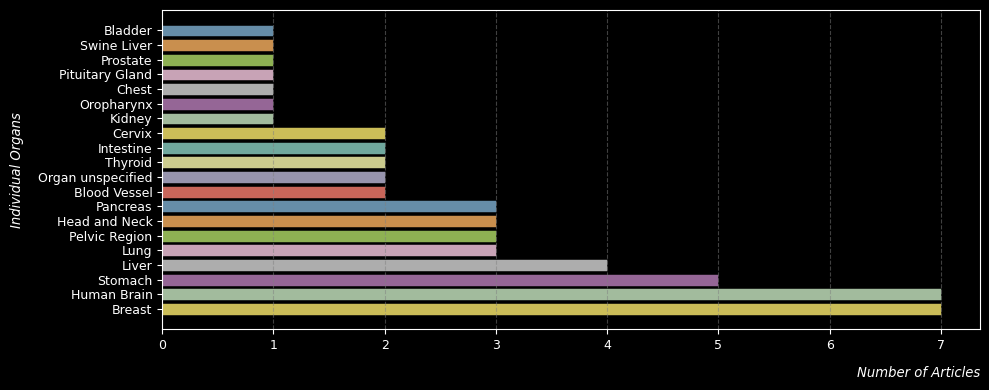

In [ ]:
analyze_organ_distribution_extensive_use_demographics(df, 'organ/body part in datasets', 'dataset quantity', '05MICCAI_notebook_data_visualization')

In [ ]:
print(df['dataset quantity'].sum())

216


In [ ]:
# # Group by 'organ_types' (individual organs) and count occurrences for 'Extensive Use Of Demographic Data'
# # Replace organ names in the DataFrame with standardized names using the mapping

# # Replace organ names in the DataFrame with standardized names using the mapping
# df_expanded['organ_types'] = df_expanded['organ_types'].apply(lambda x: organ_mapping.get(x, x))

# # Filter the data for 'Extensive Use of Demographic Data'
# extensive_demo_data = df_expanded[df_expanded['demographics_usage'] == 'Extensive Use of Demographic Data']

# # Regroup by 'organ_types' and count occurrences
# grouped_extensive_demo = extensive_demo_data.groupby('organ_types').size().reset_index(name='Count')

# # Sort the DataFrame based on 'Count' to make the plot more readable
# grouped_extensive_demo_sorted = grouped_extensive_demo.sort_values('Count', ascending=False)

# # Plotting the details for 'Extensive Use Of Demographic Data' with horizontal bars for individual organs
# colors = plt.cm.Set3_r.colors  # Or any other colormap that you like
# plt.figure(figsize=(10,2.5))  

# plt.barh(grouped_extensive_demo_sorted['organ_types'], grouped_extensive_demo_sorted['Count'], color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)
# plt.title('Distribution of Individual Organs within "Extensive Use Of Demographic Data"', fontsize=11.5, loc='center')
# plt.xlabel('Number of Articles', fontsize=10, labelpad=10, loc='right', style='italic')
# plt.ylabel('Individual Organs', fontsize=10, labelpad=10, loc='bottom', style='italic')

# plt.xticks(fontsize=10, color='black')
# plt.yticks(fontsize=10, color='black')
# plt.grid(axis='x', linestyle='--', which='both', color='gray', alpha=0.5)

# #plt.savefig('individual_organs_extensive_demographic_data.png', dpi=300, bbox_inches='tight', transparent=True)
# save_plot_to_folder(plt, 'individual_organs_extensive_demographic_data.png') # Save the plot to the plots folder
# plt.tight_layout()
# plt.show()

In [ ]:
# # Group by 'organ_types' (individual organs) and count occurrences for 'Limited Use Of Demographic Data'
# # Replace organ names in the DataFrame with standardized names using the mapping
# df_expanded['organ_types'] = df_expanded['organ_types'].apply(lambda x: organ_mapping.get(x, x))

# # Filter the data for 'Limited Use of Demographic Data'
# limited_demo_data = df_expanded[df_expanded['demographics_usage'] == 'Limited Use of Demographic Data']

# # Regroup by 'organ_types' and count occurrences
# grouped_limited_demo = limited_demo_data.groupby('organ_types').size().reset_index(name='Count')

# # Sort the DataFrame based on 'Count' to make the plot more readable
# grouped_limited_demo_sorted = grouped_limited_demo.sort_values('Count', ascending=False)

# # Plotting the details for 'Limited Use Of Demographic Data' with horizontal bars for individual organs
# colors = plt.cm.Set3_r.colors  
# plt.figure(figsize=(10, 3))  
# plt.barh(grouped_limited_demo_sorted['organ_types'], grouped_limited_demo_sorted['Count'], color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)
# plt.title('Distribution of Individual Organs within "Limited Use Of Demographic Data"', fontsize=11.5, loc='center')
# plt.xlabel('Number of Articles', fontsize=10, labelpad=10, loc='right', style='italic')
# plt.ylabel('Individual Organs', fontsize=10, labelpad=10, loc='bottom', style='italic')
# #plt.xlim(0, 5)

# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)

# plt.grid(axis='x', linestyle='--', which='both', color='gray', alpha=0.5)

# #plt.savefig('individual_organs_limited_demographic_data.png', dpi=300, bbox_inches='tight', transparent=True)
# save_plot_to_folder(plt, 'individual_organs_limited_demographic_data.png') # Save the plot to the plots folder
# plt.tight_layout()  
# plt.show()


In [ ]:
# def plot_organ_distribution_by_demographics(df, organ_column, demo_usage_column, save_path):
#     """
#     Plots a stacked bar chart of the distribution of organ categories across different demographic usage.

#     Parameters:
#     df (DataFrame): The DataFrame containing the data.
#     organ_column (str): The column name for the organ categories.
#     demo_usage_column (str): The column name for demographic usage.
#     save_path (str): The path to save the plot image.
#     """

#     # Expand the 'organ_category_refined' to separate rows for each category
#     df_expanded = df.drop(organ_column, axis=1).join(df[organ_column].str.split(', ').explode().reset_index(drop=True))

#     # Group by 'demographics_usage' and the expanded 'organ_category_refined', then count each group
#     grouped = df_expanded.groupby([demo_usage_column, organ_column]).size().reset_index(name='Count')

#     # Find the top 5 organ types
#     top_organ_types = df_expanded[organ_column].value_counts().head(6).index.tolist()

#     # Filter the DataFrame for only the top 5 organ types
#     df_top_organ_types = df_expanded[df_expanded[organ_column].isin(top_organ_types)]

#     # Group by 'demographic_usage' and the filtered 'organ_column', then count each group
#     grouped = df_top_organ_types.groupby([demo_usage_column, organ_column]).size().reset_index(name='Count')

#     # Pivot data to get 'organ_column' categories as columns filled with counts
#     pivot_df = grouped.pivot_table(index=demo_usage_column, columns=organ_column, values='Count', fill_value=0)

#     # Set the color palette using a gradient based on count, matching the previous plot
#     colors = sns.color_palette("cool", n_colors=len(top_organ_types))
#     color_dict = {organ: color for organ, color in zip(top_organ_types, colors)}  # Map colors to organ types

#     # Plotting the horizontal stacked bar chart
#     ax = pivot_df.plot(kind='barh', stacked=True, figsize=(10, 3), color=[color_dict.get(organ, '#333333') for organ in pivot_df.columns], width=0.95, edgecolor='black', linewidth=0.5, alpha=0.9)

#     plt.xlabel('Distribution of Organs', fontsize=12, labelpad=15, loc='right', style='italic')
#     plt.ylabel('Demographics Usage', fontsize=12, labelpad=15, loc='top', style='italic')

#     ax.set_yticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold', va='top')

#     plt.legend(title='Organs', loc='lower right', fontsize='12.5', shadow=False, fancybox=True, ncol=2, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5, labelspacing=0.5, handlelength=1., handletextpad=0.5, handleheight=1.)
    
#     plt.grid(axis='x', linestyle='--', which='both', color='gray', alpha=0.5)

#     # Save and show the plot
#     save_plot_to_folder(plt, save_path) # Save the plot to the plots folder
#     plt.show()

# def plot_organ_distribution_by_demographics(df, organ_column, demo_usage_column, save_path):
#     """
#     Plots a stacked bar chart of the distribution of organ categories across different demographic usage.

#     Parameters:
#     df (DataFrame): The DataFrame containing the data.
#     organ_column (str): The column name for the organ categories.
#     demo_usage_column (str): The column name for demographic usage.
#     save_path (str): The path to save the plot image.
#     """

#     # Expand the 'organ_category_refined' to separate rows for each category
#     df_expanded = df.drop(organ_column, axis=1).join(df[organ_column].str.split(', ').explode().reset_index(drop=True))

#     # Group by 'demographics_usage' and the expanded 'organ_category_refined', then count each group
#     grouped = df_expanded.groupby([demo_usage_column, organ_column]).size().reset_index(name='Count')

#     # Find the top 5 organ types
#     top_organ_types = df_expanded[organ_column].value_counts().head(6).index.tolist()

#     # Filter the DataFrame for only the top 5 organ types
#     df_top_organ_types = df_expanded[df_expanded[organ_column].isin(top_organ_types)]

#     # Group by 'demographic_usage' and the filtered 'organ_column', then count each group
#     grouped = df_top_organ_types.groupby([demo_usage_column, organ_column]).size().reset_index(name='Count')

#     # Pivot data to get 'organ_column' categories as columns filled with counts
#     pivot_df = grouped.pivot_table(index=demo_usage_column, columns=organ_column, values='Count', fill_value=0)

#     # Plotting the horizontal stacked bar chart
#     colors = plt.cm.Set3_r.colors

#     # Plotting the horizontal stacked bar chart
#     ax = pivot_df.plot(kind='barh', stacked=True, figsize=(10, 3), color=colors, width=0.95,edgecolor='black', linewidth=0.5, alpha=0.9)
    
#     plt.ylabel('Distribution of Organs', fontsize=12, labelpad=15, loc='top', style='italic').set_visible(True)
#     plt.xlabel('Demographics Usage', fontsize=12, labelpad=15, loc='right', style='italic' ).set_visible(True)
    
#     ax.set_yticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold', va='top')
    
#     plt.legend(loc='lower right', fontsize='12.5',shadow=False, fancybox=True, ncol=2, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
#                labelspacing=0.5, handlelength=1., handletextpad=0.5, handleheight=1.)
    
#     plt.grid(axis='x', linestyle='--', which='both', color='gray', alpha=0.5)

#     #plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
#     save_plot_to_folder(plt, save_path) # Save the plot to the plots folder
#     plt.show()

# def plot_organ_distribution_by_demographics(df, organ_column, demo_usage_column, save_path):
#     """
#     Plots a stacked bar chart of the distribution of organ categories across different demographic usage.

#     Parameters:
#     df (DataFrame): The DataFrame containing the data.
#     organ_column (str): The column name for the organ categories.
#     demo_usage_column (str): The column name for demographic usage.
#     save_path (str): The path to save the plot image.
#     """

#     # Expand the 'organ_category_refined' to separate rows for each category
#     df_expanded = df.drop(organ_column, axis=1).join(
#         df[organ_column].str.split(', ').explode().reset_index(drop=True))

#     # Group by 'demographics_usage' and the expanded 'organ_category_refined', then count each group
#     grouped = df_expanded.groupby([demo_usage_column, organ_column]).size().reset_index(name='Count')

#     # Find the top 5 organ types
#     top_image_types = df_expanded[organ_column].value_counts().head(5).index.tolist()

#     # Filter the DataFrame for only the top 5 organ types
#     df_top_image_types = df_expanded[df_expanded[organ_column].isin(top_image_types)]

#     # Group by 'demographic_usage' and the filtered 'organ_column', then count each group
#     grouped = df_top_image_types.groupby([demo_usage_column, organ_column]).size().reset_index(name='Count')

#     # Pivot data to get 'organ_column' categories as columns filled with counts
#     pivot_df = grouped.pivot_table(index=demo_usage_column, columns=organ_column, values='Count', fill_value=0)

#     # Plotting the horizontal stacked bar chart
#     colors = plt.cm.Set3_r.colors

#     # Plotting the horizontal stacked bar chart
#     ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 8), color=colors, width=0.95,
#                 edgecolor='black', linewidth=0.5, alpha=0.9)
#     plt.ylabel('Distribution of Organs', fontsize=12, labelpad=15, loc='top', style='italic').set_visible(True)
#     plt.xlabel('Demographics Usage', fontsize=12, labelpad=15, loc='right', style='italic' ).set_visible(True)
#     ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold', va='top')
#     plt.legend(loc='upper left', fontsize='12.5',
#               shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
#               labelspacing=0.5, handlelength=1., handletextpad=0.5, handleheight=1.)
#     plt.yticks(fontsize=9)
#     plt.xlim(-0.49, 2.49)
#     plt.grid(axis='x', linestyle='--')
#     plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
#     plt.show()

In [ ]:
# import matplotlib.ticker as ticker

# def plot_image_distribution_by_demographics(df, image_column, demo_usage_column, save_path):
#     """
#     Plots a stacked bar chart of the top 5 image types categories across different demographic usage.

#     Parameters:
#     df (DataFrame): The DataFrame containing the data.
#     image_column (str): The column name for the image categories.
#     demo_usage_column (str): The column name for demographic usage.
#     save_path (str): The path to save the plot image.
#     """

#     # Expand the 'image_column' to separate rows for each image type
#     df_expanded = df.drop(image_column, axis=1).join(df[image_column].str.split(', ').explode().reset_index(drop=True))

#     # Find the top 5 image types
#     top_image_types = df_expanded[image_column].value_counts().head(6).index.tolist()

#     # Filter the DataFrame for only the top 5 image types
#     df_top_image_types = df_expanded[df_expanded[image_column].isin(top_image_types)]

#     # Group by 'demographic_usage' and the filtered 'image_column', then count each group
#     grouped = df_top_image_types.groupby([demo_usage_column, image_column]).size().reset_index(name='Count')

#     # Pivot data to get 'image_column' categories as columns filled with counts
#     pivot_df = grouped.pivot_table(index=demo_usage_column, columns=image_column, values='Count', fill_value=0)

#     # Plotting the horizontal stacked bar chart
#     colors = plt.cm.tab20c.colors[1:]  # Adjust color selection for top 5

#     # Plotting the horizontal stacked bar chart
#     ax = pivot_df.plot(kind='barh', stacked=True, figsize=(10, 3), color=colors, width=0.95, edgecolor='black', linewidth=0.5, alpha=0.9)

#     plt.ylabel('Distribution of Image Types', fontsize=12, labelpad=15, loc='top', style='italic').set_visible(True)
#     plt.xlabel('Demographic Usage', fontsize=12, labelpad=15, loc='right', style='italic').set_visible(True)
#     ax.set_yticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')

#     # Set the y-axis ticks using MultipleLocator
#     interval = 10  # Set this to your desired interval
#     ax.xaxis.set_major_locator(ticker.MultipleLocator(interval))
    
#     plt.legend(fontsize='12.5', loc='lower right', bbox_to_anchor=(0.65, -0.6), shadow=False, fancybox=True, ncol=2, frameon=True, edgecolor='black', framealpha=1, 
#                borderpad=0.5,labelspacing=0.5, handlelength=1., handletextpad=0.5, handleheight=1.)
    
#     plt.grid(axis='x', linestyle='--', which='both', color='gray', alpha=0.5)
    
#     #plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
#     save_plot_to_folder(plt, save_path) # Save the plot to the plots folder
#     plt.show()

# import matplotlib.ticker as ticker
# def plot_image_distribution_by_demographics(df, image_column, demo_usage_column, save_path):
#     """
#     Plots a stacked bar chart of the top 5 image types categories across different demographic usage.

#     Parameters:
#     df (DataFrame): The DataFrame containing the data.
#     image_column (str): The column name for the image categories.
#     demo_usage_column (str): The column name for demographic usage.
#     save_path (str): The path to save the plot image.
#     """

#     # Expand the 'image_column' to separate rows for each image type
#     df_expanded = df.drop(image_column, axis=1).join(
#         df[image_column].str.split(', ').explode().reset_index(drop=True))

#     # Find the top 5 image types
#     top_image_types = df_expanded[image_column].value_counts().head(5).index.tolist()

#     # Filter the DataFrame for only the top 5 image types
#     df_top_image_types = df_expanded[df_expanded[image_column].isin(top_image_types)]

#     # Group by 'demographic_usage' and the filtered 'image_column', then count each group
#     grouped = df_top_image_types.groupby([demo_usage_column, image_column]).size().reset_index(name='Count')

#     # Pivot data to get 'image_column' categories as columns filled with counts
#     pivot_df = grouped.pivot_table(index=demo_usage_column, columns=image_column, values='Count', fill_value=0)

#     # Plotting the horizontal stacked bar chart
#     colors = plt.cm.tab20c.colors[1:]  # Adjust color selection for top 5

#     # Plotting the horizontal stacked bar chart
#     ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 8), color=colors, width=0.95,
#                 edgecolor='black', linewidth=0.5, alpha=0.9)

#     plt.ylabel('Distribution of Image Types', fontsize=12, labelpad=15, loc='top', style='italic').set_visible(True)
#     plt.xlabel('Demographic Usage', fontsize=12, labelpad=15, loc='right', style='italic').set_visible(True)
#     ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')
#     plt.xlim(-0.49, 2.49)
    
#     # Set the y-axis ticks using MultipleLocator
#     interval = 10  # Set this to your desired interval
#     ax.yaxis.set_major_locator(ticker.MultipleLocator(interval))
    
#     plt.legend(fontsize='12.5', loc='upper left', shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, 
#     borderpad=0.5,labelspacing=0.5, handlelength=1., handletextpad=0.5, handleheight=1.)
#     plt.grid(axis='x', linestyle='--')
#     plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
#     plt.show()

In [ ]:
# def reclassify_locations(df, location_column):
#     """
#     Reclassify the location categories into four broad categories.

#     Parameters:
#     df (DataFrame): The DataFrame containing the data.
#     location_column (str): The column name for the location categories.

#     Returns:
#     DataFrame: The DataFrame with updated location categories.
#     """
#     # Define your classification logic
#     healthcare_facilities = ['Healthcare facility']  # Replace with actual healthcare location identifiers
#     geographical_entities = ['Large-scale geographical entity', 'Subnational geographical entity']  # Replace with actual geographical location identifiers
#     no_location_info = 'No Location information'

#     # Apply classification
#     df['Reclassified_Location'] = df[location_column].apply(
#         lambda x: 'Healthcare facilities' if x in healthcare_facilities 
#         else ('Geographical entities' if x in geographical_entities
#               else ('No Location information' if x == no_location_info
#                     else 'Other locations'))
#     )

#     return df

# def plot_location_distribution_by_demographics(df, demo_column, location_column, save_path):
#     """
#     Plots a stacked bar chart of the distribution of reclassified location categories across different demographic usages.

#     Parameters:
#     df (DataFrame): The DataFrame containing the data.
#     demo_column (str): The column name for the demographic usages.
#     location_column (str): The column name for the location categories.
#     save_path (str): The path to save the plot image.
#     """
#     # Reclassify locations
#     df = reclassify_locations(df, location_column)

#     colors = plt.cm.Accent_r.colors[3:]

#     # Group by 'Demographic' and 'Reclassified_Location', then count each group
#     grouped = df.groupby([demo_column, 'Reclassified_Location']).size().reset_index(name='Count')

#     # Pivot data to get 'Reclassified_Location' categories as columns filled with counts
#     pivot_df = grouped.pivot_table(index=demo_column, columns='Reclassified_Location', values='Count', fill_value=0)

#     # Plotting
#     ax = pivot_df.plot(kind='barh', stacked=True, figsize=(10, 3), color=colors, width=0.95, edgecolor='black', linewidth=0.5, alpha=0.9)

#     # Colors for the plot
#     colors = plt.cm.Accent_r.colors[3:]

#     # Group by 'Demographic' and 'Location', then count each group
#     grouped = df.groupby([demo_column, location_column]).size().reset_index(name='Count')

#     # Pivot data to get 'Location' categories as columns filled with counts
#     pivot_df = grouped.pivot_table(index=demo_column, columns=location_column, values='Count', fill_value=0)

#     plt.xlabel('Demographic Usage', fontsize=12, labelpad=15, loc='right', style='italic')
#     plt.ylabel('Distribution of Location Types', fontsize=12, labelpad=15, loc='top', style='italic')
    
#     ax.set_yticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')
    
#     plt.legend(loc='lower right', fontsize='12.5', title_fontsize='small', shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', 
#                framealpha=1, borderpad=0.5,labelspacing=0.5, handlelength=1., handletextpad=0.5, handleheight=1.)
    
#     plt.grid(axis='x', linestyle='--', which='both', color='gray', alpha=0.5)
    
#     #plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
#     save_plot_to_folder(plt, save_path) # Save the plot to the plots folder
#     plt.show()

# def reclassify_locations(df, location_column):
#     """
#     Reclassify the location categories into four broad categories.

#     Parameters:
#     df (DataFrame): The DataFrame containing the data.
#     location_column (str): The column name for the location categories.

#     Returns:
#     DataFrame: The DataFrame with updated location categories.
#     """
#     # Define your classification logic
#     healthcare_facilities = ['Healthcare facility']  # Replace with actual healthcare location identifiers
#     geographical_entities = ['Large-scale geographical entity', 'Subnational geographical entity']  # Replace with actual geographical location identifiers
#     no_location_info = 'No Location information'

#     # Apply classification
#     df['Reclassified_Location'] = df[location_column].apply(
#         lambda x: 'Healthcare facilities' if x in healthcare_facilities 
#         else ('Geographical entities' if x in geographical_entities
#               else ('No Location information' if x == no_location_info
#                     else 'Other locations'))
#     )

#     return df

# def plot_location_distribution_by_demographics(df, demo_column, location_column, save_path):
#     """
#     Plots a stacked bar chart of the distribution of reclassified location categories across different demographic usages.

#     Parameters:
#     df (DataFrame): The DataFrame containing the data.
#     demo_column (str): The column name for the demographic usages.
#     location_column (str): The column name for the location categories.
#     save_path (str): The path to save the plot image.
#     """
#     # Reclassify locations
#     df = reclassify_locations(df, location_column)

#     colors = plt.cm.Accent_r.colors[3:]

#     # Group by 'Demographic' and 'Reclassified_Location', then count each group
#     grouped = df.groupby([demo_column, 'Reclassified_Location']).size().reset_index(name='Count')

#     # Pivot data to get 'Reclassified_Location' categories as columns filled with counts
#     pivot_df = grouped.pivot_table(index=demo_column, columns='Reclassified_Location', values='Count', fill_value=0)

#     # Plotting
#     ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 8), color=colors, width=0.95,
#                        edgecolor='black', linewidth=0.5, alpha=0.9)

#     colors = plt.cm.Accent_r.colors[3:]

#     # Group by 'Demographic' and 'Location', then count each group
#     grouped = df.groupby([demo_column, location_column]).size().reset_index(name='Count')

#     # Pivot data to get 'Location' categories as columns filled with counts
#     pivot_df = grouped.pivot_table(index=demo_column, columns=location_column, values='Count', fill_value=0)

#     plt.xlabel('Demographic Usage', fontsize=12, labelpad=15, loc='right', style='italic')
#     plt.ylabel('Distribution of Location Types', fontsize=12, labelpad=15, loc='top', style='italic')
#     ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')
#     plt.xlim(-0.5, len(pivot_df.index)-0.5)
#     plt.legend(loc='upper left', fontsize='12.5', title_fontsize='small',
#                shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
#                labelspacing=0.5, handlelength=1., handletextpad=0.5, handleheight=1.)
#     plt.grid(axis='x', linestyle='--')
#     plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
#     plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Let's filter for the top 5 organs first
# top_dist_organs_percentage = grouped_no_demo_sorted.nlargest(14, 'Count')

# # Calculate percentage of total for annotation
# total_count = top_dist_organs_percentage['Count'].sum()
# top_dist_organs_percentage['Percentage'] = (top_dist_organs_percentage['Count'] / total_count * 100).round(2)

# # Set the color palette using a gradient based on count
# palette = sns.color_palette("cool", n_colors=len(top_dist_organs_percentage))

# # Plotting
# plt.figure(figsize=(10, 5))
# bars = plt.barh(top_dist_organs_percentage['organ_types'], top_dist_organs_percentage['Count'], color=palette, edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)

# # Add value labels to each bar
# for bar, pct in zip(bars, top_dist_organs_percentage['Percentage']):
#     plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f' {int(bar.get_width())} ({pct}%)', va='center', ha='left', color='black', fontsize=9)

# plt.title('Top Distribution of Organ within "No Demographic Data"', fontsize=16)
# plt.xlabel('Number of Articles', fontsize=10, labelpad=10, loc='right', style='italic')
# plt.ylabel('Individual Organs', fontsize=10, labelpad=10, loc='top', style='italic')

# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)

# plt.grid(axis='x', linestyle='--', which='both', color='gray', alpha=0.3)

# plt.tight_layout()
# save_plot_to_folder(plt, 'top_dist_individual_organs_no_demographic_data_percentage.png') # Save the plot to the plots folder
# plt.show()

## MICCAI 2023 Volumes in 10 Parts
***

- Part I: Machine learning with limited supervision and machine learning – transfer learning;
- Part II: Machine learning – learning strategies; machine learning – explainability, bias, and uncertainty;
- Part III: Machine learning – explainability, bias and uncertainty; image segmentation;
- Part IV: Image segmentation;
- Part V: Computer-aided diagnosis;
- Part VI: Computer-aided diagnosis; computational pathology;
- Part VII: 
    - clinical applications – abdomen; 
    - clinical applications – breast; 
    - clinical applications – cardiac; 
    - clinical applications – dermatology; 
    - clinical applications – fetal imaging; 
    - clinical applications – lung; 
    - clinical applications – musculoskeletal; 
    - clinical applications – oncology; 
    - clinical applications – ophthalmology; 
    - clinical applications – vascular;
- Part VIII: Clinical applications – neuroimaging; microscopy;
- Part IX: Image-guided intervention, surgical planning, and data science;
- Part X: Image reconstruction and image registration.

In [ ]:
# # Distribution of papers by volume (since they cover different ML methods, clinical applications, etc.)
# df1['vol'].value_counts().plot(kind='barh', figsize=(6, 3.5), color='skyblue', edgecolor='black', linewidth=0.5, alpha=0.8)

In [ ]:
# def plot_demographic_distribution(df, save_path):
#     """Plots the distribution of demographic categories in a given DataFrame."""
#     # Define demographics categories
#     demographics = ['age', 'sex/gender', 'ethnicity', 'geographical location ']

#     # Filter out entries with 'No Demographic Data'
#     df_filtered = df[df['demographics_usage'] != 'No Demographic Data']

#     # Create dummy variables for demographics categories
#     df_dummy_filtered = pd.get_dummies(df_filtered[demographics])

#     # Summing up the dummies under each 'demographics_usage' category
#     pivot_df = df_dummy_filtered.groupby(df_filtered['demographics_usage']).sum()

#     # Define labels for the plot
#     labels_demo = ['Age', 'Sex', 'Ethnicity', 'Geographical Location']

#     # Plotting the data in a stacked bar chart format
#     fig, ax = plt.subplots(figsize=(10, 3.6))
#     pivot_df.plot(kind='barh', stacked=True, color=plt.cm.tab20_r.colors[5:], width=0.95, edgecolor='black', linewidth=0.5, alpha=0.8, ax=ax)

#     # Customizing the plot appearance
#     ax.set_ylabel('Demographic Usage', loc='top', fontsize=12, labelpad=15, style='italic')
#     ax.set_xlabel('Distribution of Demographic Categories', loc='right', fontsize=12, labelpad=15, style='italic')
#     ax.set_yticklabels(['Extensive Use', 'Limited Use'], fontsize=12, rotation=0, fontweight='bold', va='center')
    
#     plt.grid(axis='x', linestyle='--', which='both', color='gray', alpha=0.5)

#     #ax.set_ylim(-0.4, 1.4)

#     # Setting the legend
#     ax.legend(labels=labels_demo, bbox_to_anchor=(0.125, -0.65), loc='lower center', fontsize='11.5', title_fontsize='small', title='Demographic Categories', 
#               shadow=False, fancybox=True, ncol=4, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5, labelspacing=0.3, handlelength=1.5, 
#               handletextpad=0.5, handleheight=1.5)

#     # Tight layout and save figure
#     #plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
#     save_plot_to_folder(plt, save_path) # Save the plot to the plots folder
#     plt.tight_layout()
#     plt.show()

In [ ]:
# def plot_dataset_quantities(df, figsize=(8, 3), colors=plt.cm.tab10_r.colors):
#     """Plot the distribution of dataset quantities."""
#     dataset_counts = df['dataset quantity'].value_counts().sort_index()

#     plt.figure(figsize=figsize)
#     dataset_counts.plot(kind='barh', color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, width=0.8)
#     plt.xlabel('Number of Datasets', fontsize=9, labelpad=5, loc='right')
#     plt.ylabel('Number of Articles', fontsize=9, labelpad=5, loc='top')
#     plt.xticks(fontsize=9)
#     plt.yticks(fontsize=9)
#     plt.grid(True, linestyle='--', which='both', color='gray', alpha=0.5)
#     plt.tight_layout()
#     #plt.savefig('dataset_quantities.png', dpi=300, bbox_inches='tight', transparent=True)
#     save_plot_to_folder(plt, 'dataset_quantities.png') # Save the plot to the plots folder
#     plt.show()

In [ ]:
# def compute_summary_statistics(df):
#     """Compute and print summary statistics for the given DataFrame."""
#     total_articles = df['title'].nunique()
#     total_datasets = df['dataset quantity'].sum()
#     average_datasets = df['dataset quantity'].mean()
#     total_public_datasets = df['quantity of public datasets'].sum()
#     total_private_datasets = df['quantity of private datasets'].sum()
#     total_unknown_datasets = total_datasets - total_public_datasets - total_private_datasets
#     disclosure_distribution = df.groupby('dataset_disclosure_category')['dataset quantity'].sum()
#     total_disclosure = disclosure_distribution.sum()
#     location = (df['location '] == 0).sum()
#     no_location = len(df) - location
#     location_as_healthcare = df['location as a healthcare facility'].sum()
#     location_as_other = df['location as other (center/department/laboratory/university/institution/online)'].sum()
#     location_as_large_geo = df['location as large-scale geographical entity'].sum()
#     location_as_subnational = df['location as subnational geographical entity'].sum()
#     print("Summary Statistics:")
    
#     print("Dataset Usage in MICCAI 2023 Articles")
#     print(f"Total number of articles: {total_articles}")
#     print(f"Total number of datasets used: {total_datasets}")
#     print(f"Average number of datasets per article: {average_datasets:.2f}")
#     print(f"The maximum number of datasets used in a single article: {df['dataset quantity'].max()}")
    
#     print("\nPublic/Private Dataset Information:")
#     print(f"Total number of public datasets: {total_public_datasets}")
#     print(f"Total number of private datasets: {total_private_datasets}")
#     print(f"Total number of unknown availability of datasets: {total_unknown_datasets}")
#     print("Distribution by disclosure category:")
#     print(f"{disclosure_distribution}\n")
    
#     print("\nSource Information of Datasets in MICCAI 2023 Articles")
#     print(f"Total number of articles disclosing location information of datasets: {location}")
#     print(f"Total number of articles not disclosing location information of datasets: {no_location}")
#     print("\nLocation Information of Datasets:")
#     print(f"Location as a healthcare facility: {location_as_healthcare}")
#     print(f"Location as other: {location_as_other}")
#     print(f"Location as large-scale geographical entity: {location_as_large_geo}")
#     print(f"Location as subnational geographical entity: {location_as_subnational}")

# def compute_demographic_information(df):
#     """Compute and print demographic information."""
#     total_demo = df['demographics_usage'].value_counts()
#     print("\nDemographics Information and Usage in MICCAI 2023 Articles")
#     print(f"Total number of articles with age information of study subjects: {df['age'].sum()}")
#     print(f"Total number of articles with sex/gender information of study subjects: {df['sex/gender'].sum()}")
#     print(f"Total number of articles with ethnicity information of study subjects: {df['ethnicity'].sum()}")
#     print(f"Total number of articles with geographical location of study subjects: {df['geographical location '].sum()}")

# def compute_organ_information(df, organ_counts, unique_organs, preprocessed_organ_type_counts):
#     """Compute and print information about organ distribution in the dataset."""
#     print("\nOrgan Information and Usage in MICCAI 2023 Articles")
#     print(f"Total distribution of organs: {organ_counts.sum()}")
#     print(f"Total number of unique organs before organising data into main categories: {len(unique_organs)}")
#     print(f"Total number of unique organs after organising data into main categories: {len(preprocessed_organ_type_counts)}")
#     print("The distribution of organs by organ category:")
#     print(preprocessed_organ_type_counts)

# def compute_image_information(df, image_counts, unique_image_types, preprocessed_image_type_counts):
#     """Compute and print information about image type distribution in the dataset."""
#     print("\nImage Information and Usage in MICCAI 2023 Articles")
#     print(f"Total distribution of image types: {image_counts.sum()}")
#     print(f"Total number of unique image types before organising data into main categories: {len(unique_image_types)}")
#     print(f"Total number of unique image types after organising data into main categories: {len(preprocessed_image_type_counts)}")
#     print("The distribution of image types by image category:")
#     print(preprocessed_image_type_counts)

In [ ]:
  # # Standardize organ names using a predefined mapping
    # organ_mapping = {
    #     'colon': 'Colon', 'brain': 'Human Brain', 'human brain': 'Human Brain', 'cerebral': 'Human Brain',
    #     'breast': 'Breast', 'liver': 'Liver', 'lung': 'Lung', 'prostate': 'Prostate', 'pancreas': 'Pancreas',
    #     'kidney': 'Kidney', 'head': 'Head and Neck', 'neck': 'Head and Neck', 'abdomen': 'Stomach',
    #     'stomach': 'Stomach', 'chest': 'Chest', 'eye': 'Eye', 'gallbladder': 'Gallbladder', 'heart': 'Heart',
    #     'bladder': 'Bladder', 'skin': 'Skin', 'spleen': 'Spleen', 'thyroid': 'Thyroid', 'whole body': 'Whole Body',
    #     'no organ mentioned': 'No Organ Mentioned'
    # }